<a href="https://colab.research.google.com/github/apoorva2810/CS6910/blob/main/DL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

     |████████████████████████████████| 2.0MB 8.6MB/s 
     |████████████████████████████████| 133kB 47.0MB/s 
     |████████████████████████████████| 163kB 34.1MB/s 
     |████████████████████████████████| 102kB 10.8MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=0d684cb1be9f9c47e7c7b5dd02e7c7ff2cb8184144e292cdc19d0290f094b9bb
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=90c9554a39ede1f491411244eb782514edf78c1188475df27ad41bcb670b90fd
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [ ]:
import wandb
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [7]:
#importing the fasihion mnist dataset from keras
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.metrics import accuracy_score, mean_squared_error
import tensorflow as tf
from sklearn.metrics import log_loss

In [ ]:
def sigmoid(x):
    temp=np.zeros((len(x),1))
    for i in range(len(x)):
        if(x[i]>=0):
            temp[i]=1.0/(1.0+np.exp(-x[i]))
        else:
            temp[i]=np.exp(x[i])/(1.0+np.exp(x[i]))
    return temp

In [ ]:
def sigmoid_dif(x):
    return x*(1-x)

In [ ]:
def tanh(x):
    # temp=np.zeros((len(x),1))
    # for i in range(len(x)):
    #     temp[i]=np.exp(x[i])-np.exp(-x[i])/np.exp(x[i])+np.exp(-x[i])
    # return temp
    return np.tanh(x)

In [ ]:
def tanh_dif(x):
    return (1 - (x)**2)

In [ ]:
def relu(x):
    temp=np.zeros((len(x),1))
    for i in range(len(x)):
        if x[i]>0:
            temp[i]=x[i]
    return temp

In [ ]:
def relu_dif(x):
    temp=np.zeros((len(x),1))
    for i in range(len(x)):
        if x[i]>0:
            temp[i]=1
    return temp


In [ ]:
def softmax(x):
    mx=np.max(x)
    x=x-mx
    return np.exp(x)/np.sum(np.exp(x))

In [ ]:
def initialize_network(layer_size_list,mthd):
    weights={}
    bias={}
    if mthd=='random':
        for i,x,y in zip(range(len(layer_size_list)-1),layer_size_list[:-1],layer_size_list[1:]):
            weights[i+1]=np.random.randn(y,x)
        for i,x in zip(range(len(layer_size_list)-1),layer_size_list[1:]):
            bias[i+1]=np.zeros((x,1))
        return weights,bias
    elif mthd=='xavier':
        initializer = tf.keras.initializers.GlorotNormal()
        for i,x,y in zip(range(len(layer_size_list)-1),layer_size_list[:-1],layer_size_list[1:]):
            weights[i+1]=np.array(initializer(shape=(y, x)))
        for i,x in zip(range(len(layer_size_list)-1),layer_size_list[1:]):
            bias[i+1]=np.zeros((x,1))
        return weights,bias

In [ ]:
def forward_propagation(x,weights,bias,mthd):
    a={}
    h={}
    h[0]=x
    layers=len(weights)
    if mthd=='sigmoid':
        for i in range(layers-1):
            a[i+1]=np.matmul(weights[i+1],h[i])+bias[i+1]
            h[i+1]=sigmoid(a[i+1])
        a[layers]=np.matmul(weights[layers],h[layers-1])+bias[layers]
        h[layers]=softmax(a[layers])
        #return h[layers]
        return a,h
    elif mthd=='tanh':
        for i in range(layers-1):
            a[i+1]=np.matmul(weights[i+1],h[i])+bias[i+1]
            h[i+1]=tanh(a[i+1])
        a[layers]=np.matmul(weights[layers],h[layers-1])+bias[layers]
        h[layers]=softmax(a[layers])
        #return h[layers]
        return a,h
    elif mthd=='relu':
        for i in range(layers-1):
            a[i+1]=np.matmul(weights[i+1],h[i])+bias[i+1]
            h[i+1]=relu(a[i+1])
        a[layers]=np.matmul(weights[layers],h[layers-1])+bias[layers]
        h[layers]=softmax(a[layers])
        #return h[layers]
        return a,h
        

In [ ]:
def back_propagation(x,y,weights,bias,mthd):
    a,h=forward_propagation(x.reshape(784,1),weights,bias,mthd)
    dW={}
    dB={}
    dH={}
    dA={}
    layers=len(weights)
    y_label=[0]*10
    y_label[y]=1
    y_label=np.array(y_label).reshape(10,1)
    dA[layers]=h[layers].reshape(10,1)-y_label
    for i in range(layers,0,-1):
        dW[i]=np.matmul(dA[i],h[i-1].T)
        dB[i]=dA[i]
        dH[i-1]=np.matmul(weights[i].T,dA[i])
        if mthd=='sigmoid':
            dA[i-1]=np.multiply(dH[i-1],sigmoid_dif(h[i-1]))
        elif mthd=='tanh':
            dA[i-1]=np.multiply(dH[i-1],tanh_dif(h[i-1]))
        elif mthd=='relu':
            dA[i-1]=np.multiply(dH[i-1],relu_dif(h[i-1]))
    return dW,dB    

In [ ]:
#Optimization Functions

In [ ]:
def stochastic_gradient_descent(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0,batch_size=10):
    for e in range(epochs):
        dw={}
        db={}
        ce_train=0
        ce_val=0
        num_point_seen=0
        for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
            dw[i+1]=np.zeros((y,x))
        for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
            db[i+1]=np.zeros((x,1))
        for j,k in zip(train_images[0:30000],train_labels[0:30000]):
            tdw,tdb=back_propagation(j,k,weights,bias,mthd)
            for l in range(len(layers_size_list)-1):
                dw[l+1]+=tdw[l+1]
                db[l+1]+=tdb[l+1]
            num_point_seen+=1
            if num_point_seen==batch_size:
                for z in range(len(layers_size_list)-1):
                    weights[z+1]=weights[z+1]-learning_rate*dw[z+1]/batch_size-learning_rate*alpha*weights[z+1]
                    bias[z+1]=bias[z+1]-learning_rate*db[z+1]/batch_size
                for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
                    dw[i+1]=np.zeros((y,x))
                for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
                    db[i+1]=np.zeros((x,1))
                num_point_seen=0
        res=[]
        for i in train_images[0:30000]:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res.append(h[len(weights)])
        y_pred=[]
        for i in res:
            j=list(i)
            temp=j.index(max(j))
            y_pred.append(temp)
        train_acc=accuracy_score(y_pred, train_labels[0:30000])
        #the below code is for calculating cross entropy
        '''for i in range(len(train_labels[0:30000])):
            j=[0]*10
            j[train_labels[i]]=1
            ce_train+=cross_entropy(res[i],j)'''
        res_test=[]
        for i in test_images:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res_test.append(h[len(weights)])
        '''for i in range(len(test_labels)):
            j=[0]*10
            j[test_labels[i]]=1
            ce_val+=cross_entropy(res_test[i],j)'''
        ce_train=log_loss(train_labels[0:30000],np.array(res).reshape((30000,10)))
        ce_val=log_loss(test_labels,np.array(res_test).reshape((10000,10)))
            #mse1+=mse(res[i],j)
        #print("CE-loss:",ce/len(train_labels[0:30000]))
        #print("MSE-loss:",mse1/len(train_labels[0:30000]))
        #if((e+1)%100==0):
        #print(e,":",train_acc)
        test_acc=test_accuracy(weights,bias,test_images,test_labels,mthd)
        wandb.log({
        "Epoch": e,
        "Train Loss": ce_train,
        "Train Acc": train_acc,
        "Valid Loss": ce_val,
        "Valid Acc": test_acc})
        #res.append(train_acc)
        #print(e,":",train_acc)
    return weights,bias

In [ ]:
def momentum_gradient_descent(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0):
    for e in range(epochs):
        dw={}
        db={}
        prev_vw={}
        prev_vb={}
        ce_train=0
        ce_val=0
        for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
            dw[i+1]=np.zeros((y,x))
            prev_vw[i+1]=np.zeros((y,x))
        for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
            db[i+1]=np.zeros((x,1))
            prev_vb[i+1]=np.zeros((x,1))
        for j,k in zip(train_images[0:30000],train_labels[0:30000]):
            tdw,tdb=back_propagation(j,k,weights,bias,mthd)
            for l in range(len(layers_size_list)-1):
                dw[l+1]+=tdw[l+1]
                db[l+1]+=tdb[l+1]
        m=len(train_images[0:30000])
        v_w={}
        v_b={}
        gamma=0.9
        for i in range(len(layers_size_list)-1):
            v_w[i+1]=gamma*prev_vw[i+1]+learning_rate*dw[i+1]#/m
            v_b[i+1]=gamma*prev_vb[i+1]+learning_rate*db[i+1]#/m
            weights[i+1]=weights[i+1]-v_w[i+1]-learning_rate*alpha*weights[i+1] #this is l2 regularisation
            bias[i+1]=bias[i+1]-v_b[i+1]
            prev_vw[i+1]=v_w[i+1]
            prev_vb[i+1]=v_b[i+1]
        res=[]
        for i in train_images[0:30000]:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res.append(h[len(weights)])
        y_pred=[]
        for i in res:
            j=list(i)
            temp=j.index(max(j))
            y_pred.append(temp)
        train_acc=accuracy_score(y_pred, train_labels[0:30000])
        #the below code is for calculating cross entropy
        '''for i in range(len(train_labels[0:30000])):
            j=[0]*10
            j[train_labels[i]]=1
            ce_train+=cross_entropy(res[i],j)'''
        res_test=[]
        for i in test_images:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res_test.append(h[len(weights)])
        '''for i in range(len(test_labels)):
            j=[0]*10
            j[test_labels[i]]=1
            ce_val+=cross_entropy(res_test[i],j)
            #mse1+=mse(res[i],j)'''
        ce_train=log_loss(train_labels[0:30000],np.array(res).reshape((30000,10)))
        ce_val=log_loss(test_labels,np.array(res_test).reshape((10000,10)))
        #print("CE-loss:",ce/len(train_labels[0:30000]))
        #print("MSE-loss:",mse1/len(train_labels[0:30000]))
        #if((e+1)%100==0):
        #print(e,":",train_acc)
        test_acc=test_accuracy(weights,bias,test_images,test_labels,mthd)
        wandb.log({
        "Epoch": e,
        "Train Loss": ce_train,
        "Train Acc": train_acc,
        "Valid Loss": ce_val,
        "Valid Acc": test_acc})
        #res.append(train_acc)
        #print(e,":",train_acc)
    return weights,bias

In [ ]:
def nestrov_gradient_descent(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0):
    for e in range(epochs):
        dw={}
        db={}
        prev_vw={}
        prev_vb={}
        ce_train=0
        ce_val=0
        for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
            dw[i+1]=np.zeros((y,x))
            prev_vw[i+1]=np.zeros((y,x))
        for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
            db[i+1]=np.zeros((x,1))
            prev_vb[i+1]=np.zeros((x,1))
        v_w={}
        v_b={}
        gamma=0.9
        for i in range(len(layers_size_list)-1):
            v_w[i+1]=gamma*prev_vw[i+1]
            v_b[i+1]=gamma*prev_vb[i+1]
        tempw={}
        tempb={}
        for i in range(len(layers_size_list)-1):
            tempw[i+1]=weights[i+1]-v_w[i+1]
            tempb[i+1]=bias[i+1]-v_b[i+1]
        for j,k in zip(train_images[0:30000],train_labels[0:30000]):
            tdw,tdb=back_propagation(j,k,tempw,tempb,mthd)
            for l in range(len(layers_size_list)-1):
                dw[l+1]+=tdw[l+1]
                db[l+1]+=tdb[l+1]
        m=len(train_images[0:30000])
        for i in range(len(layers_size_list)-1):
            v_w[i+1]=gamma*prev_vw[i+1]+learning_rate*dw[i+1]#/m
            v_b[i+1]=gamma*prev_vb[i+1]+learning_rate*db[i+1]#/m
            weights[i+1]=weights[i+1]-v_w[i+1]-learning_rate*alpha*weights[i+1]
            bias[i+1]=bias[i+1]-v_b[i+1]
            prev_vw[i+1]=v_w[i+1]
            prev_vb[i+1]=v_b[i+1]
        res=[]
        for i in train_images[0:30000]:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res.append(h[len(weights)])
        y_pred=[]
        for i in res:
            j=list(i)
            temp=j.index(max(j))
            y_pred.append(temp)
        train_acc=accuracy_score(y_pred, train_labels[0:30000])
        #the below code is for calculating cross entropy
        '''for i in range(len(train_labels[0:30000])):
            j=[0]*10
            j[train_labels[i]]=1
            ce_train+=cross_entropy(res[i],j)'''
        res_test=[]
        for i in test_images:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res_test.append(h[len(weights)])
        '''for i in range(len(test_labels)):
            j=[0]*10
            j[test_labels[i]]=1
            ce_val+=cross_entropy(res_test[i],j)
            #mse1+=mse(res[i],j)'''
        ce_train=log_loss(train_labels[0:30000],np.array(res).reshape((30000,10)))
        ce_val=log_loss(test_labels,np.array(res_test).reshape((10000,10)))
        #print("CE-loss:",ce/len(train_labels[0:30000]))
        #print("MSE-loss:",mse1/len(train_labels[0:30000]))
        #if((e+1)%100==0):
        #print(e,":",train_acc)
        test_acc=test_accuracy(weights,bias,test_images,test_labels,mthd)
        wandb.log({
        "Epoch": e,
        "Train Loss": ce_train,
        "Train Acc": train_acc,
        "Valid Loss": ce_val,
        "Valid Acc": test_acc})
        #res.append(train_acc)
        #print(e,":",train_acc)
    return weights,bias

In [ ]:
def rmsprop(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0):
    res=[]
    vw={}
    vb={}
    for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
        vw[i+1]=np.zeros((y,x))
    for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
        vb[i+1]=np.zeros((x,1))
    eps=1e-8
    beta1=0.9
    for e in range(epochs):
        dw={}
        db={}
        ce_train=0
        ce_val=0
        for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
            dw[i+1]=np.zeros((y,x))
        for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
            db[i+1]=np.zeros((x,1))
        for j,k in zip(train_images[0:30000],train_labels[0:30000]):
            tdw,tdb=back_propagation(j,k,weights,bias,mthd)
            for l in range(len(layers_size_list)-1):
                dw[l+1]+=tdw[l+1]
                db[l+1]+=tdb[l+1]
        #m=len(train_images[0:30000])
        for l in range(len(layers_size_list)-1):
            vw[l+1]=vw[l+1]*beta1+(1-beta1)*(dw[l+1]**2)
            vb[l+1]=vb[l+1]*beta1+(1-beta1)*(db[l+1]**2)
        for i in range(len(layers_size_list)-1):
            weights[i+1]=weights[i+1]-(learning_rate)*(dw[i+1]/np.sqrt(vw[i+1]+eps))-learning_rate*alpha*weights[i+1]
            bias[i+1]=bias[i+1]-(learning_rate)*(db[i+1]/np.sqrt(vb[i+1]+eps))
        
        #below code is for testing accuracy on train data
        res=[]
        for i in train_images[0:30000]:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res.append(h[len(weights)])
        y_pred=[]
        for i in res:
            j=list(i)
            temp=j.index(max(j))
            y_pred.append(temp)
        train_acc=accuracy_score(y_pred, train_labels[0:30000])
        #the below code is for calculating cross entropy
        '''for i in range(len(train_labels[0:30000])):
            j=[0]*10
            j[train_labels[i]]=1
            ce_train+=cross_entropy(res[i],j)'''
        res_test=[]
        for i in test_images:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res_test.append(h[len(weights)])
        '''for i in range(len(test_labels)):
            j=[0]*10
            j[test_labels[i]]=1
            ce_val+=cross_entropy(res_test[i],j)
            #mse1+=mse(res[i],j)'''
        ce_train=log_loss(train_labels[0:30000],np.array(res).reshape((30000,10)))
        ce_val=log_loss(test_labels,np.array(res_test).reshape((10000,10)))
        #print("CE-loss:",ce/len(train_labels[0:30000]))
        #print("MSE-loss:",mse1/len(train_labels[0:30000]))
        #if((e+1)%100==0):
        #print(e,":",train_acc)
        test_acc=test_accuracy(weights,bias,test_images,test_labels,mthd)
        wandb.log({
        "Epoch": e,
        "Train Loss": ce_train,
        "Train Acc": train_acc,
        "Valid Loss": ce_val,
        "Valid Acc": test_acc})
        #res.append(train_acc)
        #print(e,":",train_acc)
    return weights,bias

In [ ]:
def adam(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0):
    res=[]
    vw={}
    vb={}
    mw={}
    mb={}
    mw_hat={}
    mb_hat={}
    vw_hat={}
    vb_hat={}
    for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
        vw[i+1]=np.zeros((y,x))
        mw[i+1]=np.zeros((y,x))
        mw_hat[i+1]=np.zeros((y,x))
        vw_hat[i+1]=np.zeros((y,x))
        
    for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
        vb[i+1]=np.zeros((x,1))
        mb[i+1]=np.zeros((x,1))
        mb_hat[i+1]=np.zeros((x,1))
        vb_hat[i+1]=np.zeros((x,1))

    eps=1e-8
    beta1=0.9
    beta2=0.999
    for e in range(epochs):
        dw={}
        db={}
        ce_train=0
        ce_val=0
        for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
            dw[i+1]=np.zeros((y,x))
        for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
            db[i+1]=np.zeros((x,1))
        for j,k in zip(train_images[0:30000],train_labels[0:30000]):
            tdw,tdb=back_propagation(j,k,weights,bias,mthd)
            for l in range(len(layers_size_list)-1):
                dw[l+1]+=tdw[l+1]
                db[l+1]+=tdb[l+1]
        #m=len(train_images[0:30000])
        for l in range(len(layers_size_list)-1):
            mw[l+1]=mw[l+1]*beta1+(1-beta1)*(dw[l+1])
            mb[l+1]=mb[l+1]*beta1+(1-beta1)*(db[l+1])
            
        
        for l in range(len(layers_size_list)-1):
            vw[l+1]=vw[l+1]*beta2+(1-beta2)*(dw[l+1]**2)
            vb[l+1]=vb[l+1]*beta2+(1-beta2)*(db[l+1]**2)
            
        for l in range(len(layers_size_list)-1):
            mw_hat[l+1]=mw[l+1]/(1-(beta1**(e+1)))
            mb_hat[l+1]=mb[l+1]/(1-(beta1**(e+1)))
            
        for l in range(len(layers_size_list)-1):
            vw_hat[l+1]=vw[l+1]/(1-(beta2**(e+1)))
            vb_hat[l+1]=vb[l+1]/(1-(beta2**(e+1)))
            
        for i in range(len(layers_size_list)-1):
            weights[i+1]=weights[i+1]-(learning_rate)*(mw_hat[i+1]/np.sqrt(vw_hat[i+1]+eps))-learning_rate*alpha*weights[i+1]
            bias[i+1]=bias[i+1]-(learning_rate)*(mb_hat[i+1]/np.sqrt(vb_hat[i+1]+eps))
        
        #below code is for testing accuracy on train data
        res=[]
        for i in train_images[0:30000]:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res.append(h[len(weights)])
        y_pred=[]
        for i in res:
            j=list(i)
            temp=j.index(max(j))
            y_pred.append(temp)
        train_acc=accuracy_score(y_pred, train_labels[0:30000])
        #the below code is for calculating cross entropy
        '''for i in range(len(train_labels[0:30000])):
            j=[0]*10
            j[train_labels[i]]=1
            ce_train+=cross_entropy(res[i],j)'''
        res_test=[]
        for i in test_images:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res_test.append(h[len(weights)])
        '''for i in range(len(test_labels)):
            j=[0]*10
            j[test_labels[i]]=1
            ce_val+=cross_entropy(res_test[i],j)'''
        ce_train=log_loss(train_labels[0:30000],np.array(res).reshape((30000,10)))
        ce_val=log_loss(test_labels,np.array(res_test).reshape((10000,10)))
        #print("CE-loss:",ce/len(train_labels[0:30000]))
        #print("MSE-loss:",mse1/len(train_labels[0:30000]))
        #if((e+1)%100==0):
        #print(e,":",train_acc)
        test_acc=test_accuracy(weights,bias,test_images,test_labels,mthd)
        wandb.log({
        "Epoch": e,
        "Train Loss": ce_train,
        "Train Acc": train_acc,
        "Valid Loss": ce_val,
        "Valid Acc": test_acc})
        #res.append(train_acc)
        #print(e,":",train_acc)
    return weights,bias

In [ ]:
def nadam(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0):
    res=[]
    vw={}
    vb={}
    mw={}
    mb={}
    mw_hat={}
    mb_hat={}
    vw_hat={}
    vb_hat={}
    for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
        vw[i+1]=np.zeros((y,x))
        mw[i+1]=np.zeros((y,x))
        mw_hat[i+1]=np.zeros((y,x))
        vw_hat[i+1]=np.zeros((y,x))
        
    for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
        vb[i+1]=np.zeros((x,1))
        mb[i+1]=np.zeros((x,1))
        mb_hat[i+1]=np.zeros((x,1))
        vb_hat[i+1]=np.zeros((x,1))

    eps=1e-8
    beta1=0.9
    beta2=0.999
    for e in range(epochs):
        dw={}
        db={}
        ce_train=0
        ce_val=0
        for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
            dw[i+1]=np.zeros((y,x))
        for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
            db[i+1]=np.zeros((x,1))
        for j,k in zip(train_images[0:30000],train_labels[0:30000]):
            tdw,tdb=back_propagation(j,k,weights,bias,mthd)
            for l in range(len(layers_size_list)-1):
                dw[l+1]+=tdw[l+1]
                db[l+1]+=tdb[l+1]
        #m=len(train_images[0:30000])
        for l in range(len(layers_size_list)-1):
            mw[l+1]=mw[l+1]*beta1+(1-beta1)*(dw[l+1])
            mb[l+1]=mb[l+1]*beta1+(1-beta1)*(db[l+1])
            
        
        for l in range(len(layers_size_list)-1):
            vw[l+1]=vw[l+1]*beta2+(1-beta2)*(dw[l+1]**2)
            vb[l+1]=vb[l+1]*beta2+(1-beta2)*(db[l+1]**2)
            
        for l in range(len(layers_size_list)-1):
            mw_hat[l+1]=mw[l+1]/(1-(beta1**(e+1)))
            mb_hat[l+1]=mb[l+1]/(1-(beta1**(e+1)))
            
        for l in range(len(layers_size_list)-1):
            vw_hat[l+1]=vw[l+1]/(1-(beta2**(e+1)))
            vb_hat[l+1]=vb[l+1]/(1-(beta2**(e+1)))
        #xk = xk - (n/(vc_k**0.5 + epsilon))*(b1*mc_k + (1-b1)*gt/(1-b1**iter_count))  
        for i in range(len(layers_size_list)-1):
            numrw=beta1*mw_hat[i+1]+(1-beta1)/(1-beta1**(e+1))*dw[i+1]
            weights[i+1]=weights[i+1]-(learning_rate)*(numrw/np.sqrt(vw_hat[i+1]+eps))-learning_rate*alpha*weights[i+1]
            
            numrb=beta1*mb_hat[i+1]+(1-beta1)/(1-beta1**(e+1))*db[i+1]
            bias[i+1]=bias[i+1]-(learning_rate)*(numrb/np.sqrt(vb_hat[i+1]+eps))
        
        #below code is for testing accuracy on train data
        res=[]
        for i in train_images[0:30000]:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res.append(h[len(weights)])
        y_pred=[]
        for i in res:
            j=list(i)
            temp=j.index(max(j))
            y_pred.append(temp)
        train_acc=accuracy_score(y_pred, train_labels[0:30000])
        print(e+1,":",train_acc)
        #the below code is for calculating cross entropy
        '''for i in range(len(train_labels[0:30000])):
            j=[0]*10
            j[train_labels[i]]=1
            ce_train+=cross_entropy(res[i],j)'''
        res_test=[]
        for i in test_images:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res_test.append(h[len(weights)])
        '''for i in range(len(test_labels)):
            j=[0]*10
            j[test_labels[i]]=1
            ce_val+=cross_entropy(res_test[i],j)'''
            #mse1+=mse(res[i],j)
        ce_train=log_loss(train_labels[0:30000],np.array(res).reshape((30000,10)))
        ce_val=log_loss(test_labels,np.array(res_test).reshape((10000,10)))
        #print("CE-loss:",ce/len(train_labels[0:30000]))
        #print("MSE-loss:",mse1/len(train_labels[0:30000]))
        #if((e+1)%100==0):
        #print(e,":",train_acc)
        test_acc=test_accuracy(weights,bias,test_images,test_labels,mthd)
        wandb.log({
        "Epoch": e,
        "Train Loss": ce_train,
        "Train Acc": train_acc,
        "Valid Loss": ce_val,
        "Valid Acc": test_acc})
        #res.append(train_acc)
        #print(e,":",train_acc)
    return weights,bias

In [ ]:
def mse(pred,label):
    label=np.array(label).reshape(10,1)
    mse=0
    for i in range(len(label)):
        mse+=(pred[i]-label[i])**2
    return mse[0]

In [ ]:
def cross_entropy(pred,label):
    yl=np.multiply(pred,np.array(label).reshape(10,1))
    yl=yl[yl!=0]
    yl=-np.log(yl)
    #yl=np.mean(yl)
    return yl[0]

In [ ]:
def test_accuracy(weights,bias,test_images,test_labels,mthd):
    res=[]
    for i in test_images:
        a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
        res.append(h[len(weights)])
    y_pred=[]
    for i in res:
        j=list(i)
        temp=j.index(max(j))
        y_pred.append(temp)
    test_acc=accuracy_score(y_pred, test_labels)
    return test_acc

In [ ]:
sweep_config_temp={
  "name": "DL Assign-1-ed2",
  "method": "random",
  'metric': {
      'name': 'accuracy',
      'goal': 'maximize'   
    },
  "parameters": {
        "epochs": {
            "values": [5,10]
        },
        "learning_rate":{
            "values":[0.0075,0.01]
        },
        "hidden_layer_size":{
            "values":[2]  
        },
        "layer_1_size":{
            "values":[128,64]
        },
        "layer_2_size":{
            "values":[64,32]
        },
        "optimizer":{
            "values":['rmsprop','adam','nadam']
        },
        "batch_size":{
            "values":[16]
            
        },
        "weight_decay":{
            "values":[0,0.0005]
        },
        "activation_function":{
            "values":['tanh','relu']
        },
        "weight_initialisation":{
            "values":['random','xavier']
        },
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config_temp, entity="cs20m014", project="DL Assign-1-ed2")

Create sweep with ID: 9errga6v
Sweep URL: https://wandb.ai/cs20m014/DL%20Assign-1-ed2/sweeps/9errga6v


In [ ]:
hyperparameter_defaults = dict(
    epochs=5,
    hidden_layer_size=2,
    layer_1_size=128,
    layer_2_size=64,
    learning_rate = 0.0075,
    optimizer='adam',
    batch_size=1,
    weight_decay=0.0005,
    activation_function='tanh',
    weight_initialisation='random',
    )

In [ ]:
def train():
  wandb.init(config=hyperparameter_defaults)
  config = wandb.config
  layers_size_list=[784]
  layers_size_list.append(config.layer_1_size)
  layers_size_list.append(config.layer_2_size)
  layers_size_list.append(10)   #For output layers
  
  weights,bias=initialize_network(layers_size_list,config.weight_initialisation)
  if config.optimizer=='sgd':
    weights,bias=stochastic_gradient_descent(weights,bias,config.epochs,layers_size_list,train_images,train_labels,config.learning_rate,config.activation_function,config.weight_decay)
    # stochastic_gradient_descent(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0,batch_size=10
  elif config.optimizer=='mgd':
    weights,bias=momentum_gradient_descent(weights,bias,config.epochs,layers_size_list,train_images,train_labels,config.learning_rate,config.activation_function,config.weight_decay)
    # momentum_gradient_descent(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0)
  elif config.optimizer=='nag':
    weights,bias=nestrov_gradient_descent(weights,bias,config.epochs,layers_size_list,train_images,train_labels,config.learning_rate,config.activation_function,config.weight_decay)
    # nestrov_gradient_descent(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0)
  elif config.optimizer=='rmsprop':
    weights,bias=rmsprop(weights,bias,config.epochs,layers_size_list,train_images,train_labels,config.learning_rate,config.activation_function,config.weight_decay)

  elif config.optimizer=='adam':
    weights,bias=adam(weights,bias,config.epochs,layers_size_list,train_images,train_labels,config.learning_rate,config.activation_function,config.weight_decay)
  elif config.optimizer=='nadam':
    weights,bias=nadam(weights,bias,config.epochs,layers_size_list,train_images,train_labels,config.learning_rate,config.activation_function,config.weight_decay)


In [ ]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: ck6z1c06 with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.01
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


1 : 0.20606666666666668
2 : 0.20936666666666667
3 : 0.3803
4 : 0.4464666666666667
6 : 0.593
7 : 0.6135666666666667
8 : 0.6447333333333334
9 : 0.6417666666666667
10 : 0.6726333333333333


Epoch,9
Train Loss,0.99745
Train Acc,0.67263
Valid Loss,1.00857
Valid Acc,0.6607
_runtime,261
_timestamp,1615698389
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,██▅▄▃▂▂▂▁▁
Train Acc,▁▁▄▅▆▇▇███
Valid Loss,██▅▃▃▂▂▁▁▁
Valid Acc,▁▁▄▅▇▇▇███
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: aov67xxz with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


Epoch,9
Train Loss,2.6112
Train Acc,0.40907
Valid Loss,2.59973
Valid Acc,0.408
_runtime,393
_timestamp,1615698789
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▆▅▃▃▂▂▁▁▁
Train Acc,▁▂▃▄▅▆▆▇▇█
Valid Loss,█▆▅▃▃▂▂▁▁▁
Valid Acc,▁▃▃▄▅▆▆▇▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: fcxilp56 with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,1.55221
Train Acc,0.46263
Valid Loss,1.55968
Valid Acc,0.458
_runtime,257
_timestamp,1615699054
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▇▅▅▃▂▁▂▁▁
Train Acc,▁▁▅▅▄▅█▅██
Valid Loss,█▇▅▅▃▂▁▂▁▁
Valid Acc,▁▂▅▅▄▅█▅██
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: b71y9j98 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,23.87748
Train Acc,0.2807
Valid Loss,23.7941
Valid Acc,0.283
_runtime,1917
_timestamp,1615700978
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,██▆▇▆▆▃▅▂▁
Train Acc,▁▁▃▂▃▃▆▃▇█
Valid Loss,██▆▇▆▆▃▅▂▁
Valid Acc,▁▁▃▂▃▃▆▃▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: r2rq4ii1 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


1 : 0.10596666666666667
2 : 0.16836666666666666
3 : 0.2124
4 : 0.27686666666666665
5 : 0.33766666666666667
6 : 0.3774
7 : 0.4084333333333333
8 : 0.4365
9 : 0.46376666666666666
10 : 0.4918


Epoch,9
Train Loss,17.54604
Train Acc,0.4918
Valid Loss,17.62457
Valid Acc,0.4895
_runtime,2081
_timestamp,1615703065
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▇▆▅▄▃▃▂▂▁
Train Acc,▁▂▃▄▅▆▆▇▇█
Valid Loss,█▇▆▅▄▃▂▂▂▁
Valid Acc,▁▂▃▄▅▆▇▇▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: weapwyki with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


Epoch,9
Train Loss,2.94846
Train Acc,0.33133
Valid Loss,2.95111
Valid Acc,0.3336
_runtime,392
_timestamp,1615703466
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▆▅▅▄▃▂▂▁▁
Train Acc,▁▂▃▃▄▅▆▆▇█
Valid Loss,█▆▅▅▄▃▂▂▁▁
Valid Acc,▁▂▃▃▄▅▆▆▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bjqh5x85 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


Epoch,4
Train Loss,27.61235
Train Acc,0.20043
Valid Loss,27.8795
Valid Acc,0.1927
_runtime,1047
_timestamp,1615704532
_step,4


Epoch,▁▃▅▆█
Train Loss,▁▅█▆▂
Train Acc,█▄▁▃▇
Valid Loss,▁▄█▆▃
Valid Acc,█▅▁▃▆
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: evaa0w5l with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


1 : 0.09503333333333333
2 : 0.1141
3 : 0.14203333333333334
4 : 0.1702
5 : 0.19026666666666667
6 : 0.2059
7 : 0.2254
8 : 0.2492
9 : 0.26986666666666664
10 : 0.2894


Epoch,9
Train Loss,3.47225
Train Acc,0.2894
Valid Loss,3.52868
Valid Acc,0.2899
_runtime,247
_timestamp,1615704787
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▆▅▄▃▃▂▂▁▁
Train Acc,▁▂▃▄▄▅▆▇▇█
Valid Loss,█▆▅▄▃▃▂▂▁▁
Valid Acc,▁▂▃▄▄▅▆▆▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: urtb6ju3 with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


Epoch,9
Train Loss,3.14653
Train Acc,0.39587
Valid Loss,3.15974
Valid Acc,0.3917
_runtime,402
_timestamp,1615705197
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▆▅▄▃▃▂▂▁▁
Train Acc,▁▂▃▃▄▅▆▇▇█
Valid Loss,█▆▅▄▃▃▂▂▁▁
Valid Acc,▁▂▃▃▄▅▆▇▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: 2rjc68sf with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: xavier


Epoch,4
Train Loss,1.49195
Train Acc,0.53533
Valid Loss,1.4933
Valid Acc,0.5364
_runtime,131
_timestamp,1615705335
_step,4


Epoch,▁▃▅▆█
Train Loss,█▄▃▂▁
Train Acc,▁▄▆▇█
Valid Loss,█▄▃▂▁
Valid Acc,▁▄▆▇█
_runtime,▁▃▄▆█
_timestamp,▁▃▄▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: tsfrc9p4 with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


1 : 0.10943333333333333
2 : 0.14633333333333334
3 : 0.17683333333333334
4 : 0.2117
5 : 0.2357


Epoch,4
Train Loss,4.31398
Train Acc,0.2357
Valid Loss,4.41493
Valid Acc,0.2359
_runtime,123
_timestamp,1615705465
_step,4


Epoch,▁▃▅▆█
Train Loss,█▅▃▂▁
Train Acc,▁▃▅▇█
Valid Loss,█▅▃▂▁
Valid Acc,▁▃▄▇█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: jmek53xv with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,1.28415
Train Acc,0.50893
Valid Loss,1.29028
Valid Acc,0.5112
_runtime,253
_timestamp,1615705726
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,██▇▆▄▃▂▂▂▁
Train Acc,▂▂▁▁▆▅▇▇▇█
Valid Loss,██▇▆▄▃▂▂▂▁
Valid Acc,▂▃▁▂▆▅▇▇▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: y3dnj4w1 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


1 : 0.17143333333333333
2 : 0.19906666666666667
3 : 0.13646666666666665
4 : 0.0984
5 : 0.099
6 : 0.099
7 : 0.11726666666666667
8 : 0.1651
9 : 0.1279
10 : 0.1088


Epoch,9
Train Loss,2.29537
Train Acc,0.1088
Valid Loss,2.29922
Valid Acc,0.1091
_runtime,1890
_timestamp,1615707623
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,▇▇▇███▆▃▁▁
Train Acc,▆█▄▁▁▁▂▆▃▂
Valid Loss,▇▇▇███▆▃▁▁
Valid Acc,▆█▄▁▁▁▂▆▃▂
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: f75elvks with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,1.38564
Train Acc,0.47073
Valid Loss,1.39271
Valid Acc,0.4688
_runtime,252
_timestamp,1615707883
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▆▅▃▃▂▂▃▁▁
Train Acc,▃▁▄▄▆▇▅▆▇█
Valid Loss,█▆▅▃▃▂▂▃▁▁
Valid Acc,▃▁▄▄▆▇▅▆▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: cn21zykz with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: xavier


Epoch,4
Train Loss,2.16731
Train Acc,0.30617
Valid Loss,2.17457
Valid Acc,0.3044
_runtime,215
_timestamp,1615708105
_step,4


Epoch,▁▃▅▆█
Train Loss,▂▄█▂▁
Train Acc,▅▁▂▇█
Valid Loss,▂▄█▂▁
Valid Acc,▅▁▂▇█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: 1taqb3bn with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,0.98747
Train Acc,0.65237
Valid Loss,0.99653
Valid Acc,0.6492
_runtime,399
_timestamp,1615708513
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▅▃▃▃▂▂▁▁▁
Train Acc,▁▃▅▆▇▇████
Valid Loss,█▅▃▃▃▂▂▁▁▁
Valid Acc,▁▃▅▆▇▇▇███
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: hd0iw7br with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


1 : 0.14726666666666666
2 : 0.17096666666666666
3 : 0.193
4 : 0.22116666666666668
5 : 0.2526333333333333


Epoch,4
Train Loss,3.89945
Train Acc,0.25263
Valid Loss,3.91461
Valid Acc,0.2555
_runtime,196
_timestamp,1615708718
_step,4


Epoch,▁▃▅▆█
Train Loss,█▆▄▃▁
Train Acc,▁▃▄▆█
Valid Loss,█▆▄▃▁
Valid Acc,▁▂▃▆█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: g5tp3yq5 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


1 : 0.1933
2 : 0.2315
3 : 0.2939333333333333
4 : 0.3359


wandb: Network error (HTTPError), entering retry loop. See /content/wandb/run-20210314_075847-g5tp3yq5/logs/debug-internal.log for full traceback.
wandb: Network error resolved after 0:01:39.067148, resuming normal operation.


5 : 0.3655333333333333


Epoch,4
Train Loss,21.9074
Train Acc,0.36553
Valid Loss,21.76119
Valid Acc,0.3697
_runtime,969
_timestamp,1615709696
_step,4


Epoch,▁▃▅▆█
Train Loss,█▆▄▂▁
Train Acc,▁▃▅▇█
Valid Loss,█▆▄▂▁
Valid Acc,▁▃▅▇█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: f7xato5o with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: xavier


Epoch,4
Train Loss,22.32349
Train Acc,0.306
Valid Loss,22.31787
Valid Acc,0.304
_runtime,832
_timestamp,1615710537
_step,4


Epoch,▁▃▅▆█
Train Loss,██▆▃▁
Train Acc,▁▁▂▆█
Valid Loss,██▆▃▁
Valid Acc,▁▁▂▆█
_runtime,▁▃▄▆█
_timestamp,▁▃▄▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: annc7t5n with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,21.55098
Train Acc,0.25197
Valid Loss,21.66214
Valid Acc,0.2471
_runtime,1912
_timestamp,1615712458
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,▆▆█▇▄▂▃▂▁▁
Train Acc,▄▄▁▁▄▇██▇▇
Valid Loss,▆▆█▇▄▂▃▂▁▁
Valid Acc,▄▄▁▁▄▇██▇▇
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: s4nydfpx with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: xavier


1 : 0.09866666666666667
2 : 0.09903333333333333
3 : 0.1062
4 : 0.14636666666666667
5 : 0.19026666666666667


Epoch,4
Train Loss,27.27216
Train Acc,0.19027
Valid Loss,27.29826
Valid Acc,0.192
_runtime,829
_timestamp,1615713296
_step,4


Epoch,▁▃▅▆█
Train Loss,██▇▃▁
Train Acc,▁▁▂▅█
Valid Loss,██▇▄▁
Valid Acc,▁▁▁▄█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: r21e9za7 with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.01
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


Epoch,9
Train Loss,3.13237
Train Acc,0.4241
Valid Loss,3.18167
Valid Acc,0.4216
_runtime,415
_timestamp,1615713723
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▅▄▃▂▂▂▁▁▁
Train Acc,▁▄▄▅▆▆▇▇██
Valid Loss,█▄▄▂▂▂▂▁▁▁
Valid Acc,▁▄▅▅▆▇▇▇██
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: ity6kfq8 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


1 : 0.10376666666666666
2 : 0.21796666666666667
3 : 0.28696666666666665
4 : 0.32763333333333333
5 : 0.3595333333333333
6 : 0.3988333333333333
7 : 0.4247
8 : 0.4479
9 : 0.46973333333333334
10 : 0.4917666666666667


Epoch,9
Train Loss,17.54472
Train Acc,0.49177
Valid Loss,17.52933
Valid Acc,0.4924
_runtime,1529
_timestamp,1615715260
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▆▅▄▃▃▂▂▁▁
Train Acc,▁▃▄▅▆▆▇▇██
Valid Loss,█▆▅▄▃▃▂▂▁▁
Valid Acc,▁▃▄▅▆▆▇▇██
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: e3rbz6c5 with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


Epoch,9
Train Loss,2.88965
Train Acc,0.41693
Valid Loss,2.93462
Valid Acc,0.4143
_runtime,415
_timestamp,1615715684
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▅▄▃▃▂▂▁▁▁
Train Acc,▁▁▃▄▅▆▇▇▇█
Valid Loss,█▅▄▃▃▂▂▁▁▁
Valid Acc,▁▁▃▄▅▆▇▇▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: f2g3j4pb with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


Epoch,9
Train Loss,3.97065
Train Acc,0.3837
Valid Loss,4.0892
Valid Acc,0.3762
_runtime,421
_timestamp,1615716114
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▇▅▄▃▃▂▂▁▁
Train Acc,▁▁▂▃▄▅▆▇▇█
Valid Loss,█▇▅▄▃▃▂▂▁▁
Valid Acc,▁▂▂▃▄▅▆▇▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: efreehqh with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,1.00975
Train Acc,0.63057
Valid Loss,1.02284
Valid Acc,0.6224
_runtime,434
_timestamp,1615716556
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▅▄▃▂▂▂▁▁▁
Train Acc,▁▂▄▅▆▆▇▇██
Valid Loss,█▅▄▃▂▂▂▁▁▁
Valid Acc,▁▂▄▅▆▆▇▇██
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2yqik9n6 with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,1.23573
Train Acc,0.616
Valid Loss,1.24554
Valid Acc,0.6071
_runtime,260
_timestamp,1615716836
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▆▄▄▃▃▂▂▁▁
Train Acc,▁▃▅▅▆▇▇▇██
Valid Loss,█▆▄▄▃▃▂▂▁▁
Valid Acc,▁▃▆▆▇▇▇▇██
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: m097xl74 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


1 : 0.24806666666666666
2 : 0.21733333333333332
3 : 0.2064
4 : 0.21573333333333333
5 : 0.2493
6 : 0.2778333333333333
7 : 0.30246666666666666
8 : 0.3241
9 : 0.35223333333333334
10 : 0.38106666666666666


Epoch,9
Train Loss,21.35621
Train Acc,0.38107
Valid Loss,21.36058
Valid Acc,0.381
_runtime,1523
_timestamp,1615718369
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,▆███▆▅▄▃▂▁
Train Acc,▃▁▁▁▃▄▅▆▇█
Valid Loss,▆███▆▅▄▃▂▁
Valid Acc,▃▁▁▁▃▄▅▆▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: tg29nj47 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


Epoch,9
Train Loss,19.11869
Train Acc,0.44627
Valid Loss,19.15573
Valid Acc,0.4451
_runtime,1656
_timestamp,1615720037
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▇▇▇▆▅▃▂▁▁
Train Acc,▁▂▂▂▃▄▆▇██
Valid Loss,█▇▇▇▆▅▃▂▁▁
Valid Acc,▁▂▂▂▃▄▆▇██
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: cjuze7aj with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.01
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,1.38383
Train Acc,0.47093
Valid Loss,1.39212
Valid Acc,0.4719
_runtime,260
_timestamp,1615720307
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,▅▇█▅▄▃▂▁▁▁
Train Acc,▁▂▁▃▄▆▅█▅█
Valid Loss,▅▇█▅▄▃▂▁▁▁
Valid Acc,▂▂▁▃▄▆▅█▅█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: 9dx6h3vd with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


Epoch,4
Train Loss,3.72839
Train Acc,0.2604
Valid Loss,3.6933
Valid Acc,0.2662
_runtime,125
_timestamp,1615720442
_step,4


Epoch,▁▃▅▆█
Train Loss,█▅▄▂▁
Train Acc,▁▃▅▆█
Valid Loss,█▅▄▂▁
Valid Acc,▁▃▅▇█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: z6nsrs1l with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


Epoch,4
Train Loss,5.0721
Train Acc,0.1601
Valid Loss,5.11547
Valid Acc,0.159
_runtime,127
_timestamp,1615720578
_step,4


Epoch,▁▃▅▆█
Train Loss,█▅▄▂▁
Train Acc,▁▃▄▅█
Valid Loss,█▅▄▂▁
Valid Acc,▁▃▄▆█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: 9btg1l7r with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


1 : 0.08813333333333333
2 : 0.1411
3 : 0.16443333333333332
4 : 0.2
5 : 0.23343333333333333
6 : 0.2623666666666667
7 : 0.28983333333333333
8 : 0.31766666666666665
9 : 0.3351
10 : 0.3526666666666667


Epoch,9
Train Loss,2.65951
Train Acc,0.35267
Valid Loss,2.67801
Valid Acc,0.3493
_runtime,393
_timestamp,1615720982
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▆▅▄▃▂▂▂▁▁
Train Acc,▁▂▃▄▅▆▆▇██
Valid Loss,█▆▅▄▃▂▂▂▁▁
Valid Acc,▁▂▃▄▅▆▆▇██
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: r34h8lvn with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,15.61838
Train Acc,0.468
Valid Loss,15.71731
Valid Acc,0.4663
_runtime,1496
_timestamp,1615722487
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▇▅▇▆▄▄▂▁▁
Train Acc,▁▂▄▂▃▄▄▆█▇
Valid Loss,█▇▅▇▆▄▄▁▁▁
Valid Acc,▁▁▃▂▃▄▄▆█▇
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: m1y8zrs3 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


1 : 0.13113333333333332
2 : 0.1548
3 : 0.10123333333333333
4 : 0.19776666666666667
5 : 0.10136666666666666


Epoch,4
Train Loss,2.30222
Train Acc,0.10137
Valid Loss,2.3022
Valid Acc,0.1005
_runtime,963
_timestamp,1615723464
_step,4


Epoch,▁▃▅▆█
Train Loss,███▂▁
Train Acc,▃▅▁█▁
Valid Loss,███▂▁
Valid Acc,▃▅▁█▁
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: dk9dquwz with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.01
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


Epoch,4
Train Loss,3.91372
Train Acc,0.3664
Valid Loss,3.9806
Valid Acc,0.3623
_runtime,206
_timestamp,1615723680
_step,4


Epoch,▁▃▅▆█
Train Loss,█▅▃▂▁
Train Acc,▁▃▅▇█
Valid Loss,█▅▃▂▁
Valid Acc,▁▃▅▇█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: fhz1s6jd with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


Epoch,4
Train Loss,29.16139
Train Acc,0.1555
Valid Loss,29.27166
Valid Acc,0.1525
_runtime,752
_timestamp,1615724444
_step,4


Epoch,▁▃▅▆█
Train Loss,▁▄██▁
Train Acc,█▅▁▁█
Valid Loss,▁▃▇█▃
Valid Acc,█▆▂▁▆
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: 3tb5bmam with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.01
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


1 : 0.09906666666666666
2 : 0.22853333333333334
3 : 0.10213333333333334
4 : 0.1027
5 : 0.1027


Epoch,4
Train Loss,2.30296
Train Acc,0.1027
Valid Loss,2.30328
Valid Acc,0.1
_runtime,971
_timestamp,1615725424
_step,4


Epoch,▁▃▅▆█
Train Loss,█▆▁▁▁
Train Acc,▁█▁▁▁
Valid Loss,█▆▁▁▁
Valid Acc,▁█▁▁▁
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: 046fqct5 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,21.95523
Train Acc,0.30843
Valid Loss,22.00925
Valid Acc,0.3072
_runtime,2091
_timestamp,1615727524
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▇▇▄▃▁▂▃▃▃
Train Acc,▁▂▃▅▆█▇▆▅▅
Valid Loss,█▇▇▄▃▁▂▃▃▃
Valid Acc,▁▂▃▅▆█▇▆▅▅
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: at0oaqw3 with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: xavier


Epoch,9
Train Loss,0.95566
Train Acc,0.679
Valid Loss,0.97198
Valid Acc,0.6725
_runtime,426
_timestamp,1615727960
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▇▅▄▃▃▂▂▁▁
Train Acc,▁▃▄▄▆▇▇▇██
Valid Loss,█▇▅▄▃▃▂▂▁▁
Valid Acc,▁▃▄▄▆▇▇▇██
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: sfv51b2y with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


Epoch,9
Train Loss,3.21226
Train Acc,0.4216
Valid Loss,3.24354
Valid Acc,0.4225
_runtime,258
_timestamp,1615728228
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,█▆▅▄▃▃▂▂▁▁
Train Acc,▁▁▄▄▅▆▆▆▇█
Valid Loss,█▆▅▄▃▃▂▂▁▁
Valid Acc,▁▁▄▄▅▆▆▇▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: tthwtxz8 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


1 : 0.19403333333333334
2 : 0.11286666666666667
3 : 0.20003333333333334
4 : 0.2744333333333333
5 : 0.2731


Epoch,4
Train Loss,23.7444
Train Acc,0.2731
Valid Loss,23.61818
Valid Acc,0.2764
_runtime,1069
_timestamp,1615729306
_step,4


Epoch,▁▃▅▆█
Train Loss,▅█▅▂▁
Train Acc,▅▁▅██
Valid Loss,▅█▅▂▁
Valid Acc,▅▁▅██
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: y88h4v7e with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: xavier


1 : 0.10056666666666667
2 : 0.09573333333333334
3 : 0.10096666666666666
4 : 0.227
5 : 0.2697333333333333
6 : 0.25046666666666667
7 : 0.23236666666666667
8 : 0.3542
9 : 0.3799666666666667
10 : 0.42823333333333335


Epoch,9
Train Loss,10.87396
Train Acc,0.42823
Valid Loss,10.69357
Valid Acc,0.4298
_runtime,1927
_timestamp,1615731243
_step,9


Epoch,▁▂▃▃▄▅▆▆▇█
Train Loss,███▆▆▆▅▄▃▁
Train Acc,▁▁▁▄▅▄▄▆▇█
Valid Loss,███▆▆▆▅▄▃▁
Valid Acc,▁▁▁▄▅▄▄▆▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


wandb: Agent Starting Run: 9km508iq with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 64
wandb: 	layer_2_size: 32
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_initialisation: random


Epoch,4
Train Loss,23.02865
Train Acc,0.33303
Valid Loss,22.90904
Valid Acc,0.3363
_runtime,747
_timestamp,1615731999
_step,4


Epoch,▁▃▅▆█
Train Loss,█▆▄▂▁
Train Acc,▁▃▅▇█
Valid Loss,█▆▄▂▁
Valid Acc,▁▃▅▇█
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


wandb: Agent Starting Run: 20m6ilr3 with config:
wandb: 	activation_function: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 2
wandb: 	layer_1_size: 128
wandb: 	layer_2_size: 64
wandb: 	learning_rate: 0.0075
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_initialisation: random


wandb: Ctrl + C detected. Stopping sweep.


In [ ]:
from keras.datasets import fashion_mnist
import wandb
get_ipython().system('wandb login')
wandb.init(project="DL Assign-1-ed_Q1")


(x_train, y_train),(x_test,y_test)=fashion_mnist.load_data();
classes=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
config = wandb.config
plot=[]

class_visited=[]
for x,y in zip(x_train, y_train):
    if(class_visited.count(y)<=1):
        plot.append(wandb.Image(x,caption=classes[y]))
        class_visited.append(y)

wandb.finish()

wandb: Currently logged in as: cs20m014 (use `wandb login --relogin` to force relogin)


wandb: WARNING Ignored wandb.init() arg project when running a sweep


In [ ]:
def adam1(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0):
    res=[]
    vw={}
    vb={}
    mw={}
    mb={}
    mw_hat={}
    mb_hat={}
    vw_hat={}
    vb_hat={}
    for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
        vw[i+1]=np.zeros((y,x))
        mw[i+1]=np.zeros((y,x))
        mw_hat[i+1]=np.zeros((y,x))
        vw_hat[i+1]=np.zeros((y,x))
        
    for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
        vb[i+1]=np.zeros((x,1))
        mb[i+1]=np.zeros((x,1))
        mb_hat[i+1]=np.zeros((x,1))
        vb_hat[i+1]=np.zeros((x,1))

    eps=1e-8
    beta1=0.9
    beta2=0.999
    for e in range(epochs):
        mse1=0
        dw={}
        db={}
        ce_train=0
        ce_val=0
        for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
            dw[i+1]=np.zeros((y,x))
        for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
            db[i+1]=np.zeros((x,1))
        for j,k in zip(train_images[0:30000],train_labels[0:30000]):
            tdw,tdb=back_propagation(j,k,weights,bias,mthd)
            for l in range(len(layers_size_list)-1):
                dw[l+1]+=tdw[l+1]
                db[l+1]+=tdb[l+1]
        #m=len(train_images[0:30000])
        for l in range(len(layers_size_list)-1):
            mw[l+1]=mw[l+1]*beta1+(1-beta1)*(dw[l+1])
            mb[l+1]=mb[l+1]*beta1+(1-beta1)*(db[l+1])
            
        
        for l in range(len(layers_size_list)-1):
            vw[l+1]=vw[l+1]*beta2+(1-beta2)*(dw[l+1]**2)
            vb[l+1]=vb[l+1]*beta2+(1-beta2)*(db[l+1]**2)
            
        for l in range(len(layers_size_list)-1):
            mw_hat[l+1]=mw[l+1]/(1-(beta1**(e+1)))
            mb_hat[l+1]=mb[l+1]/(1-(beta1**(e+1)))
            
        for l in range(len(layers_size_list)-1):
            vw_hat[l+1]=vw[l+1]/(1-(beta2**(e+1)))
            vb_hat[l+1]=vb[l+1]/(1-(beta2**(e+1)))
            
        for i in range(len(layers_size_list)-1):
            weights[i+1]=weights[i+1]-(learning_rate)*(mw_hat[i+1]/np.sqrt(vw_hat[i+1]+eps))-learning_rate*alpha*weights[i+1]
            bias[i+1]=bias[i+1]-(learning_rate)*(mb_hat[i+1]/np.sqrt(vb_hat[i+1]+eps))
        
        #below code is for testing accuracy on train data
        res=[]
        for i in train_images[0:30000]:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res.append(h[len(weights)])
        y_pred=[]
        for i in res:
            j=list(i)
            temp=j.index(max(j))
            y_pred.append(temp)
        train_acc=accuracy_score(y_pred, train_labels[0:30000])
        #the below code is for calculating cross entropy
        '''for i in range(len(train_labels[0:30000])):
            j=[0]*10
            j[train_labels[i]]=1
            ce_train+=cross_entropy(res[i],j)'''
        res_test=[]
        for i in test_images:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res_test.append(h[len(weights)])
        for i in range(len(test_labels)):
            j=[0]*10
            j[test_labels[i]]=1
            #ce_val+=cross_entropy(res_test[i],j)'''
            mse1+=mse(res_test[i],j)
            
        ce_train=log_loss(train_labels[0:30000],np.array(res).reshape((30000,10)))
        ce_val=log_loss(test_labels,np.array(res_test).reshape((10000,10)))
        #print("CE-loss:",ce/len(train_labels[0:30000]))
        #print("MSE-loss:",mse1/len(train_labels[0:30000]))
        #if((e+1)%100==0):
        #print(e,":",train_acc)
        test_acc=test_accuracy(weights,bias,test_images,test_labels,mthd)
        wandb.log({
         "Epoch": e,
          "Test CE Loss":ce_val,
        "Test MSE Loss":mse1 ,
         "Valid Acc": test_acc})
        #res.append(train_acc)
        #print(e,":",train_acc)
    return weights,bias,y_pred

In [ ]:
wandb.init()
config = wandb.config
#For best accuracy 
w,b=initialize_network([784,128,64,10],'xavier') 
w_best,b_best,y_temp=adam1(w,b,10,[784,128,64,10],train_images,train_labels,0.0075,'tanh',0.0005)

wandb: Currently logged in as: cs20m014 (use `wandb login --relogin` to force relogin)


In [ ]:
res_conf=[]
for i in test_images:
    a,h=forward_propagation(i.reshape(784,1),w_best,b_best,'tanh')
    res_conf.append(h[len(w_best)])

y_pred=[]
for i in res_conf:
    j=list(i)
    temp=j.index(max(j))
    y_pred.append(temp)

In [2]:
# #For confusion matrix
# classes=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# wandb.log({"conf_mat" : wandb.plot.confusion_matrix(probs=None,
#                         y_true=y_test, preds=res_conf,
#                         class_names=classes}))

In [ ]:
from sklearn.metrics import confusion_matrix
result=confusion_matrix(test_labels, y_pred)

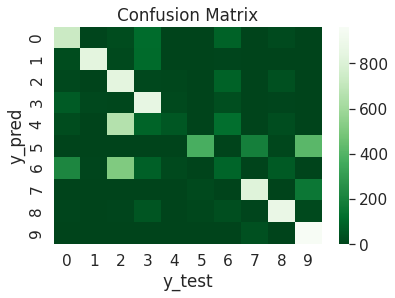

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(result, range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot_kws={"size": 10},cmap="Greens_r") # font size
plt.title("Confusion Matrix")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [3]:
#Below code is for question 1


classes=[]
for i in range(0,10):
    classes.append(i)

In [5]:
#from matplotlib import pyplot
%matplotlib inline

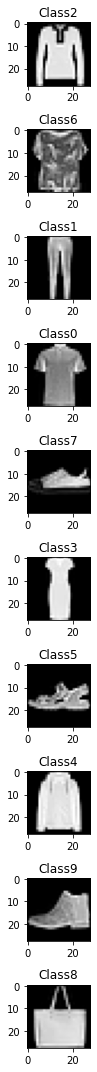

In [9]:
#print(len(classes))
fig , ax =plt.subplots(10,figsize=(15,15))
#confg = wandb.config
#plot=[]
t=0
for i in range(1100,2000):
  if train_labels[i] in classes:
    
    #print("Class ", train_labels[i])
    
    ax[t].imshow(train_images[i],cmap=plt.get_cmap('gray'))
    #plot.append(wandb.Image(train_images[i],caption=train_labels[i]) 
    ax[t].set_title('Class'+  str(train_labels[i]))
    t=t+1
    fig.tight_layout() 
    classes.remove(train_labels[i])
  if len(classes)==0:
        break

